In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
plt.rcParams['savefig.dpi'] = 150 #图片像素
plt.rcParams['figure.dpi'] = 150 #分辨率
%matplotlib inline

In [2]:
a = pd.read_csv('wander2.csv',header=None)
data = a[2]
tie = pd.array(data)
tie = np.array(tie)
np.shape(tie)

(599950,)

In [3]:
span = 784
num = round(len(tie)/span) - 1
wander_tie = 50.0 * tie
data_x = np.zeros((num, span))
for k in range(num):
    data_x[k,:] = wander_tie[span*k:span*(k+1)]
data_x_cTE = np.zeros((num, span))
for k in range(num):
    data_x_cTE[k,:] = wander_tie[span*k:span*(k+1)] + np.random.randint(-3,3)
data_x_dTE = data_x + np.random.standard_normal((num, span))* 5
data_x_normal = np.random.standard_normal((num, span)) * 15.0 +3.14
data_x_ex = np.random.exponential(1,size = (num, span)) * 3.0 - 5.0
data_x_ga = np.random.gamma(1,size = (num, span)) * 3.0 - 5.0

In [4]:
tmp1 = np.concatenate((data_x,data_x_cTE))
tmp2 = np.concatenate((tmp1,data_x_dTE))
tmp3 = np.concatenate((tmp2,data_x_normal))
tmp4 = np.concatenate((tmp3,data_x_ex))
tmp5 = np.concatenate((tmp4,data_x_ga))

In [5]:
np.shape(tmp5)
data_part2 = tmp5

In [6]:
a = pd.read_csv('wander1.csv',header=None)
data = a[2]
tie = pd.array(data)
tie = np.array(tie)
np.shape(tie)

(599950,)

In [7]:
span = 784
num = round(len(tie)/span) - 1
wander_tie = 70.0 * tie
data_x = np.zeros((num, span))
for k in range(num):
    data_x[k,:] = wander_tie[span*k:span*(k+1)]
data_x_cTE = np.zeros((num, span))
for k in range(num):
    data_x_cTE[k,:] = wander_tie[span*k:span*(k+1)] + np.random.randint(-6,6)
data_x_dTE = data_x + np.random.standard_normal((num, span))* 7
data_x_normal = np.random.standard_normal((num, span)) * 12.0 +3.5
data_x_ex = np.random.exponential(1,size = (num, span)) * 4.0 - 8.0
data_x_ga = np.random.gamma(1,size = (num, span)) * 4.0 - 2.0

In [8]:
tmp1 = np.concatenate((data_x,data_x_cTE))
tmp2 = np.concatenate((tmp1,data_x_dTE))
tmp3 = np.concatenate((tmp2,data_x_normal))
tmp4 = np.concatenate((tmp3,data_x_ex))
tmp5 = np.concatenate((tmp4,data_x_ga))
np.shape(tmp5)
data_part1 = tmp5

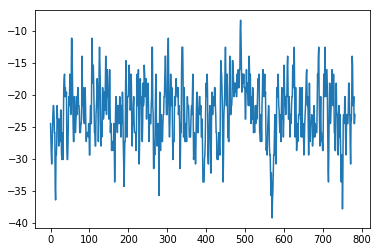

In [27]:
data_normal = np.concatenate((data_part1,data_part2))
idx = np.random.randint(1,1024)
plt.plot(data_part1[idx])

In [28]:
np.shape(data_normal)

(9168, 784)

In [29]:
def tie_gen(N1, N2, N3):
    mu = N1
    sigma = N2
    num = N3
    rand_data = np.random.normal(mu, sigma, num)
    return rand_data

In [41]:
# jump
def jump_noise_gen(N):
    jump_num = np.random.randint(8,20)
    jump_inx = np.random.randint(1,N,size=jump_num)
    jump_noise = np.random.randn(N)
    for k in range(jump_num):
        jump_noise[jump_inx[k]] = 2 *np.random.randint(1,8)
    return jump_noise

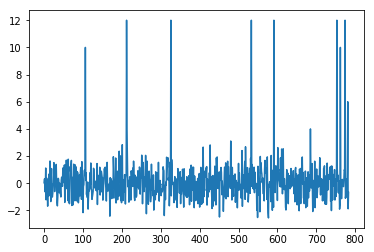

In [43]:
r = jump_noise_gen(784)
np.shape(r)
plt.plot(r)

In [60]:
def discontinue_gen_mode1():
    N1 = np.random.randint(1,5)
    N2 = np.random.randint(1,7)
    N3 = np.random.randint(1,700)
    rand_data1 = tie_gen(N1, N2, N3)
    N4 = np.random.randint(1,3)
    N5 = np.random.randint(1,9)
    N6 = 784 - N3
    rand_data2 = tie_gen(N4, N5, N6)
    discontinue_gen = np.random.randn(rand_data1.size+rand_data2.size)
    discontinue_gen[1:rand_data1.size] = rand_data1[1:rand_data1.size]
    discontinue_gen[rand_data1.size+1:rand_data1.size+rand_data2.size] = rand_data2[1:rand_data2.size] + np.random.randint(8,16)
    return discontinue_gen

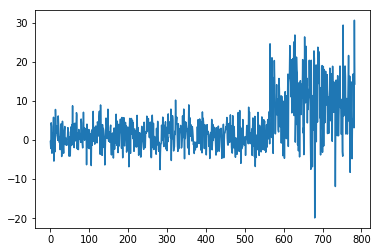

In [69]:
r = discontinue_gen_mode1()
np.shape(r)
plt.plot(r)

In [70]:
def discontinue_gen_mode2():
    N1 = np.random.randint(1,6)
    N2 = np.random.randint(1,8)
    N3 = np.random.randint(1,100)
    rand_data1 = tie_gen(N1, N2, N3)
    N4 = np.random.randint(1,10)
    N5 = np.random.randint(1,6)
    N6 = np.random.randint(100,500) 
    rand_data2 = tie_gen(N4, N5, N6)
    N7 = np.random.randint(1,5)
    N8 = np.random.randint(1,7)
    N9 = 784 - N3 - N6
    rand_data3 = tie_gen(N7, N8, N9) 
    discontinue_gen = np.random.randn(rand_data1.size+rand_data2.size+rand_data3.size)
    discontinue_gen[1:rand_data1.size] = rand_data1[1:rand_data1.size]
    discontinue_gen[rand_data1.size+1:rand_data1.size+rand_data2.size] = rand_data2[1:rand_data2.size] + np.random.randint(10,17)
    discontinue_gen[rand_data1.size+rand_data2.size+1:rand_data1.size+rand_data2.size+rand_data3.size]= rand_data3[1:rand_data3.size]
    return discontinue_gen

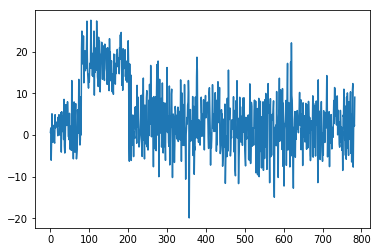

In [74]:
r = discontinue_gen_mode2()
np.shape(r)
plt.plot(r)

In [75]:
def holdover_gen(N):
    x = np.linspace(1,N,N,dtype='float')
    a = 0.2 * np.random.rand() - 4
    b = 20 * np.random.rand() - 5
    c = 4 * np.random.rand()
    y = a*x**2 + b*x +c
    return y * 1e-5

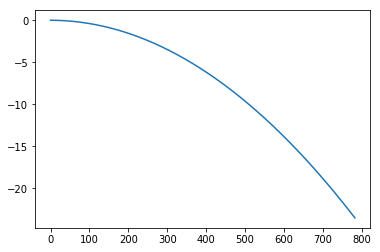

In [80]:
r = holdover_gen(784)
np.shape(r)
plt.plot(r)

In [81]:
data_x_jump = np.zeros((1000,784))
for k in range(1000):
    data_x_jump[k] = jump_noise_gen(784)
data_x_dis1 = np.zeros((1000,784))
for k in range(1000):
    data_x_dis1[k] = discontinue_gen_mode1()
data_x_dis2 = np.zeros((1000,784))
for k in range(1000):
    data_x_dis2[k] = discontinue_gen_mode2()
data_x_hd = np.zeros((1000,784))
for k in range(1000):
    data_x_hd[k] = holdover_gen(784)

In [82]:
tp1 = np.concatenate((data_x_jump,data_x_dis1))
tp2 = np.concatenate((tp1,data_x_dis2))
tp3 = np.concatenate((tp2,data_x_hd))
tp4 = -0.85 * tp3
tp5 = np.concatenate((tp3, tp4))

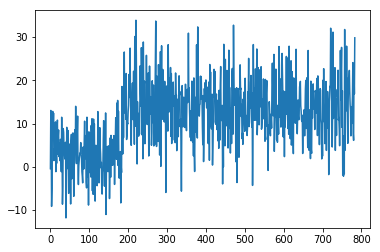

In [83]:
np.shape(tp5)
plt.plot(tp5[1024])

In [84]:
np.shape(tp5)
data_abnormal = tp5

In [85]:
y_label_normal = np.ones(9360)
y_label_abnormal = np.zeros(8000)
y_label = np.concatenate((y_label_normal,y_label_abnormal))

In [86]:
x_data = np.concatenate((data_normal,data_abnormal))

0.0


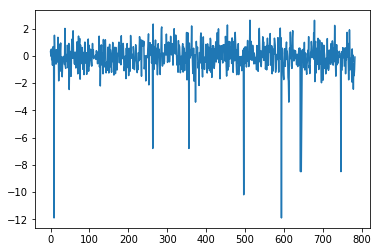

In [87]:
plt.plot(x_data[14000])
print(y_label[14000])

In [88]:
np.savetxt('sync_detection_data.txt',x_data)
np.savetxt('sync_detection_label.txt',y_label)

In [28]:
dd = np.loadtxt('sync_detection_data.txt')
np.shape(dd)
lb= np.loadtxt('sync_detection_label.txt')
np.shape(lb)

(17360,)

In [29]:
np.shape(dd)

(17168, 784)